# A Simple Numpy Implementation for GCN

Here GCN is implemented according to the paper "Semi-Supervised Classification with Graph Convolutional Networks"  Thomas N. Kipf,Max Welling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1. introduction

<img src="GCNPNG.PNG" width="40%">

(1). Adjacency matrix

In [2]:
A = np.array([
    [0, 0, 1, 0, 0],
    [1, 0, 1, 0, 0],
    [0, 0, 0, 0, 1],
    [0, 0, 1, 0, 1],
    [1, 0, 0, 0, 0]],
    dtype=float
).T

display(A)

array([[0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0.]])

In [3]:
def adjacencyBuild(n, neg, num):
    """n: current node, neg: neighbour node, num: number of the nodes"""
    
    if len(n) != len(neg):
        print("error")
        return 
    N = len(n)
    A = np.zeros((num, num))
    for i in range(N):
        A[n[i]-1, neg[i]-1] = 1
    return A.T
        
node = [1,2,2,3,4,4,5]
neig = [3,1,3,5,3,5,1]

testA = adjacencyBuild(node, neig, 5)
display(testA)
print("There are the same as the adjacency matrix above, this will be helpful for the our following adjacency matrix construction")

array([[0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0.]])

There are the same as the adjacency matrix above, this will be helpful for the our following adjacency matrix construction


(2). Define 2-channel features

In [4]:
features = np.array([
    [6, 1],
    [2, -1],
    [1, -1],
    [3, -3],
    [5, 0],
])

display(features)

array([[ 6,  1],
       [ 2, -1],
       [ 1, -1],
       [ 3, -3],
       [ 5,  0]])

In [5]:
print("A:")
display(A)
print("X(features):")
display(features)
print("AX:")
display(A.dot(features))

A:


array([[0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0.]])

X(features):


array([[ 6,  1],
       [ 2, -1],
       [ 1, -1],
       [ 3, -3],
       [ 5,  0]])

AX:


array([[ 7., -1.],
       [ 0.,  0.],
       [11., -3.],
       [ 0.,  0.],
       [ 4., -4.]])

The graph convolutional layer represents each node as the aggregation of its adjacent nodes.
As we can see, the representation of each node (each row) is the sum of the features of its adjacent nodes (the adjacent nodes that the node points to).  

(3). Add self loop

In [6]:
I = np.eye(A.shape[0])
display(I)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [7]:
A_hat = A + I
display(A_hat)

array([[1., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 1., 1., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 1., 1.]])

In [8]:
print("A*X:")
display(A_hat.dot(features))

A*X:


array([[13.,  0.],
       [ 2., -1.],
       [12., -4.],
       [ 3., -3.],
       [ 9., -4.]])

In [9]:
D = np.diag(np.array(np.sum(A_hat, axis=0)))
display(D)

array([[2., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0.],
       [0., 0., 2., 0., 0.],
       [0., 0., 0., 3., 0.],
       [0., 0., 0., 0., 2.]])

In [10]:
np.linalg.inv(D)

array([[0.5       , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.5       , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.33333333, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.5       ]])

In [11]:
D_half = np.diag(np.array(np.power(np.sum(A_hat, axis=0),-0.5)))
display(D_half)

array([[0.70710678, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.57735027, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.70710678, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.57735027, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.70710678]])

(4). normalization

$\hat{D}^{-1/2}\hat{A}\hat{D}^{-1/2}X$

$\hat{D}^{-1}\hat{A}X$

In [12]:
print("normalization1:\n")#np.linalg.matrix_power(D, -1)
print(np.dot(np.dot(np.dot(D_half,A_hat),D_half), features))
print("normalization2:\n")#np.linalg.matrix_power(D, -1)
print(np.dot(np.dot(np.linalg.inv(D),A_hat), features))

normalization1:

[[ 6.31649658  0.09175171]
 [ 0.66666667 -0.33333333]
 [ 5.54124145 -1.63299316]
 [ 1.         -1.        ]
 [ 4.22474487 -1.72474487]]
normalization2:

[[ 6.5         0.        ]
 [ 0.66666667 -0.33333333]
 [ 6.         -2.        ]
 [ 1.         -1.        ]
 [ 4.5        -2.        ]]


(5). Add weights

In [13]:
W = np.array([
             [1, -0.5],
             [-0.6, 1]
         ])

In [14]:
print("add weights:\n")
print(np.dot(np.dot(np.dot(np.linalg.inv(D),A), features),W))

add weights:

[[ 3.8  -2.25]
 [ 0.    0.  ]
 [ 6.4  -4.25]
 [ 0.    0.  ]
 [ 3.2  -3.  ]]


add activation function(tanh)

In [15]:
display(np.tanh(np.dot(np.dot(np.dot(np.linalg.inv(D),A), features),W)))

array([[ 0.9989996 , -0.97802611],
       [ 0.        ,  0.        ],
       [ 0.99999448, -0.99959315],
       [ 0.        ,  0.        ],
       [ 0.9966824 , -0.99505475]])

In [16]:
sigmoid = lambda x:1/(1+np.exp(-x))
display(sigmoid(np.dot(np.dot(np.dot(np.linalg.inv(D),A), features),W)))

array([[0.97811873, 0.09534946],
       [0.5       , 0.5       ],
       [0.9983412 , 0.01406363],
       [0.5       , 0.5       ],
       [0.96083428, 0.04742587]])

2. Application in Cora Dataset

Here, a semi-supervised task about Cora Dataset is implemented step by step

In [17]:
import torch


#do a little modified compared to before
def adjacencyBuild(n, neg, num):
    """n: current node, neg: neighbour node, num: number of the nodes"""
    if len(n) != len(neg):
        print("error")
        return 
    N = len(n)
    A = np.zeros((num, num))
    for i in range(N):
        A[n[i], neg[i]] = 1
        A[neg[i], n[i]] = 1
    return A


#define a accuracy calculation, (correct prediction)/ total
def acc_calc(true, pred):
    correct = pred.eq(true).sum().item()
    total = test_mask.sum().item()
    return (correct / total)

(1). data prepocessing(you can ignore this part, but do figure out what the data format is)

In [18]:
train_mask = torch.Tensor(np.load("data/train_mask.npy")).bool()
test_mask = torch.Tensor(np.load("data/test_mask.npy")).bool()
features = torch.Tensor(np.load("data/features.npy"))
label_list = torch.Tensor(np.load("data/label_list.npy"))
edge_index = np.load("data/edge_index.npy")
feat_dim = features.shape[1]
num_class = int(label_list.max().data.numpy() + 1) #7

node_num = features.shape[0]
A = adjacencyBuild(edge_index[0,:],edge_index[1,:], node_num)
A = A + np.eye(A.shape[0])
A = torch.Tensor(A)
D = torch.diag(pow(torch.sum(A, axis=0),-1))

In [19]:
print("{} data info{}".format("*"*30, "*"*30))
print("number of node : {}".format(node_num))
print("number of edges : {}".format(round(edge_index.shape[1]/2)))
print("number of classes : {}".format(num_class))
print("channel of node features : {}".format(feat_dim))
print("shape of feat_Matrix : {}".format(features.shape))
print("{}***********{}".format("*"*30, "*"*30))

****************************** data info******************************
number of node : 2708
number of edges : 5278
number of classes : 7
channel of node features : 1433
shape of feat_Matrix : torch.Size([2708, 1433])
***********************************************************************


(2). This part show you some basic principles, you can also jump this step. 

In [20]:
relu = lambda x:np.maximum(0,x)
sigmoid = lambda x:1/(1+np.exp(-x))

def gcn_layer(A, D, X, W, activation = 'relu'):
    if activation == 'relu':
        return relu(np.dot(np.dot(np.dot(np.linalg.inv(D),A),X),W))
    elif activation == 'sigmoid':
        return sigmoid(np.dot(np.dot(np.dot(np.linalg.inv(D),A),X),W))

In [21]:
W_N = np.random.normal(loc=0, scale=1, size=(feat_dim, node_num))
W_W = np.random.normal(loc=0, size=(node_num, num_class))

In [22]:
hidden = gcn_layer(A, D, features, W_N, activation = 'relu')
output = gcn_layer(A, D, hidden, W_W, activation = 'relu')

In [23]:
result = torch.nn.Softmax(dim=1)(torch.Tensor(output))

In [24]:
display(result.size())
display(result)
display(torch.argmax(result,dim=1))

torch.Size([2708, 7])

tensor([[0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.]])

tensor([5, 5, 5,  ..., 5, 5, 5])

In [25]:
loss_fn = torch.nn.CrossEntropyLoss()
loss = loss_fn(result, label_list.long())
display(loss)

tensor(2.0668)

(3).Start training

In [26]:
def gcn_layer(A, D, X, W, activation = 'relu'):
    if activation == 'relu':
        return torch.relu(torch.mm(torch.mm(torch.mm(D,A),X),W))
    elif activation == 'sigmoid':
        return torch.sigmoid(torch.mm(torch.mm(torch.mm(D,A),X),W))
    else:
        return torch.mm(torch.mm(torch.mm(torch.mm(D,A),D),X),W)
    
def two_layer_gcn(A, D, X, W1, W2):
    hidden = gcn_layer(A, D, X, W1, activation = None) # we do not add any activation
    output = gcn_layer(A, D, hidden, W2, activation = None)
    return torch.nn.Softmax(dim=1)(output)

In [27]:
W_N = np.random.normal(loc=0, scale=1, size=(feat_dim, 50))
W_W = np.random.normal(loc=0, size=(50, num_class))
W_N = torch.autograd.Variable(torch.Tensor(W_N), requires_grad=True)
W_W = torch.autograd.Variable(torch.Tensor(W_W), requires_grad=True)

A = torch.Tensor(A)
D = torch.Tensor(D)
features = torch.Tensor(features)

learning_rate = 1# the smaller it would be better, but after that, you need to increase the size of epoches
losses = []
epoches = 200
loss_fn = torch.nn.CrossEntropyLoss()

In [28]:
train_mask = torch.zeros(node_num, dtype=torch.bool)
train_mask[:node_num - 1000] = 1                  # 1700 training
test_mask = torch.zeros(node_num, dtype=torch.bool)
test_mask[node_num - 500:] = 1                    # 500 test

In [29]:
prediction = two_layer_gcn(A, D, features, W_N, W_W)
prediction = torch.argmax(prediction,dim=1)
correct = float(prediction[test_mask].eq(label_list[test_mask]).sum().item())
accuracy = correct / test_mask.sum().item()
print('if we do not train, the accuracy is : {:.6f}'.format(accuracy))

if we do not train, the accuracy is : 0.142000


In [30]:
for i in range(epoches):
    #hidden = gcn_layer(A_hat, D, feat_Matrix, W_N, activation = 'relu')
    #output = gcn_layer(A_hat, D, hidden, W_W, activation = 'relu')
    #result = torch.nn.Softmax(dim=1)(output)
    
    result = two_layer_gcn(A, D, features, W_N, W_W)
    loss = loss_fn(result[train_mask], label_list[train_mask].long())
    
    loss.backward()
    W_N.data.add_(-learning_rate*W_N.grad.data)
    W_W.data.add_(-learning_rate*W_W.grad.data)
    
    W_N.grad.data.zero_()
    W_W.grad.data.zero_()
    losses.append(loss.data.numpy())
    if i % 20 == 0: print('loss:{}'.format(loss))

loss:1.9543739557266235
loss:1.9424790143966675
loss:1.9297372102737427
loss:1.9173548221588135
loss:1.903292179107666
loss:1.8872184753417969
loss:1.8731129169464111
loss:1.8610827922821045
loss:1.85047447681427
loss:1.841111421585083


In [31]:
prediction = two_layer_gcn(A, D, features, W_N, W_W)
prediction = torch.argmax(prediction,dim=1)
correct = float(prediction[test_mask].eq(label_list[test_mask]).sum().item())
accuracy = correct / test_mask.sum().item()
print('after training, the accuracy: {:.6f}'.format(accuracy))

after training, the accuracy: 0.402000


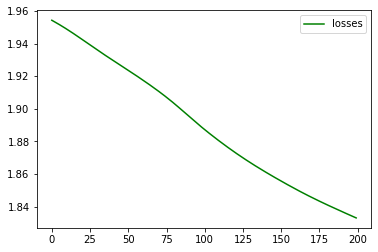

In [32]:
plt.plot(losses, label='losses', color='g')
plt.legend()
plt.show()

I applied the model on CPU just considering your convenience that you may run it on your laptop.
The accuracy of prediction is low in part because the training epoches are not enough, I set it as small just to make a quick presentation.

Another form(CUDA/CPU), in this form, we can use the built-in optimizer which is much more efficient than we used above!

We still use the A and features defined above, now we train.

In [33]:
import torch

class GCN(torch.nn.Module):
    def __init__(self, A, feat_dim, hidden_dim, num_class, droprate=0.1):
        super(GCN, self).__init__()
        
        # we set two learnable parameters (torch.nn.Parameter)
        self.W_N = torch.nn.Parameter(data=torch.rand(feat_dim, hidden_dim), requires_grad=True) 
        self.W_W = torch.nn.Parameter(data=torch.rand(hidden_dim, num_class), requires_grad=True)

        #D = torch.Tensor(np.diag(np.array(np.power(np.sum(A.data.cpu().numpy(), axis=0),-1))))
        self.D = torch.diag(pow(torch.sum(A, axis=0),-1))
        self.A = A
        self.droprate = droprate

    def gcn_layer(self, A, D, X, W):
        return torch.mm(torch.mm(torch.mm(D, A),X),W) #this is the gcn layer we defined, (D^{-1}A)XW
    
    def forward(self, X): #input -> hidden -> dropout -> logsoftmax, forward propagation
        hidden = torch.nn.ReLU()(self.gcn_layer(self.A, self.D, X, self.W_N))
        hidden = torch.nn.Dropout(p=self.droprate, inplace=False)(hidden)
        output = self.gcn_layer(self.A, self.D, hidden, self.W_W)
        output = torch.nn.LogSoftmax(dim=1)(output)
        return output



In [34]:
#automatic detect your gpu, if you do not have gpu, no worry, it will train on cpu

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 

model = GCN(A.to(device), feat_dim, 16, num_class, droprate=0.5)
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

model.train()
losses = []

for epoch in range(200):
    optimizer.zero_grad()
    output = model(features.to(device))

    loss = torch.nn.NLLLoss()(output[train_mask].to(device), label_list[train_mask].long().to(device))
    loss.backward(retain_graph=True)
    optimizer.step()
    loss_val = torch.nn.NLLLoss()(output[test_mask].to(device), label_list[test_mask].long().to(device))

    print('epoch: {:03d}'.format(epoch+1),
          'loss_train: {:.3f}'.format(loss.item()),
          'loss_val: {:.3f}'.format(loss_val.item()))

    losses.append(loss.data.cpu().numpy())

epoch: 001 loss_train: 15.205 loss_val: 13.363
epoch: 002 loss_train: 12.610 loss_val: 11.538
epoch: 003 loss_train: 11.026 loss_val: 9.663
epoch: 004 loss_train: 10.098 loss_val: 8.970
epoch: 005 loss_train: 9.917 loss_val: 9.555
epoch: 006 loss_train: 8.958 loss_val: 8.014
epoch: 007 loss_train: 8.947 loss_val: 8.168
epoch: 008 loss_train: 7.404 loss_val: 7.481
epoch: 009 loss_train: 8.239 loss_val: 7.717
epoch: 010 loss_train: 7.243 loss_val: 7.167
epoch: 011 loss_train: 6.771 loss_val: 6.991
epoch: 012 loss_train: 6.579 loss_val: 5.796
epoch: 013 loss_train: 6.140 loss_val: 5.821
epoch: 014 loss_train: 5.595 loss_val: 5.856
epoch: 015 loss_train: 5.510 loss_val: 6.050
epoch: 016 loss_train: 5.170 loss_val: 5.030
epoch: 017 loss_train: 4.651 loss_val: 4.658
epoch: 018 loss_train: 4.442 loss_val: 5.001
epoch: 019 loss_train: 4.253 loss_val: 4.686
epoch: 020 loss_train: 3.960 loss_val: 5.079
epoch: 021 loss_train: 4.604 loss_val: 4.907
epoch: 022 loss_train: 4.141 loss_val: 4.801
epoc

epoch: 182 loss_train: 0.361 loss_val: 0.513
epoch: 183 loss_train: 0.328 loss_val: 0.472
epoch: 184 loss_train: 0.334 loss_val: 0.550
epoch: 185 loss_train: 0.346 loss_val: 0.518
epoch: 186 loss_train: 0.345 loss_val: 0.468
epoch: 187 loss_train: 0.334 loss_val: 0.612
epoch: 188 loss_train: 0.337 loss_val: 0.497
epoch: 189 loss_train: 0.336 loss_val: 0.458
epoch: 190 loss_train: 0.325 loss_val: 0.497
epoch: 191 loss_train: 0.351 loss_val: 0.581
epoch: 192 loss_train: 0.343 loss_val: 0.531
epoch: 193 loss_train: 0.339 loss_val: 0.540
epoch: 194 loss_train: 0.334 loss_val: 0.555
epoch: 195 loss_train: 0.323 loss_val: 0.495
epoch: 196 loss_train: 0.305 loss_val: 0.471
epoch: 197 loss_train: 0.334 loss_val: 0.444
epoch: 198 loss_train: 0.317 loss_val: 0.472
epoch: 199 loss_train: 0.312 loss_val: 0.474
epoch: 200 loss_train: 0.324 loss_val: 0.464


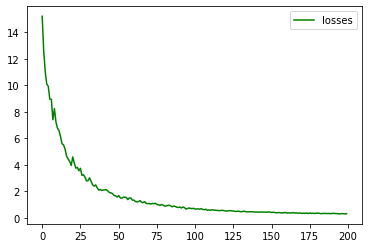

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(losses, label='losses', color='g')
plt.legend()
plt.show()

In [36]:
model.eval()
_, prediction = model(features.cuda()).max(dim=1)
acc = acc_calc(label_list[test_mask].to(device),prediction[test_mask].to(device))
print("accuracy of in test set: ", acc)

accuracy of in test set:  0.856


I believe still have a gap between our model and the model assigned in paper--code can be see in(https://github.com/tkipf/gcn)